# Creating a mass plot from CERN OpenData

In this example, we'll import some detector data and make a plot of the masses of the particles detected.

To begin, click the "play" icon or press shift+ENTER to execute each cell.

In [1]:
# First, we'll "import" the software packages needed.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

# Starting a line with a hashtag tells the program not to read the line.
# That way we can write "comments" to humans trying to figure out what the code does.
# Blank lines don't do anything either, but they can make the code easier to read.

/home/main/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/main/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Importing a data set
Now let's choose some data to plot. In this example we'll pull data from CERN's CMS detector and make a histogram of invariant mass. You can find more at CERN OpenData

This next cell will take a little while to run since it's grabbing a pretty big data set. This one contains 100,000 collision events. The cell label will look like "In [\*]" while it's still thinking and "In [2]" when it's finished.

In [2]:
# Whenever you type "something =" it defines a new variable, "something", 
# and sets it equal to whatever follows the equals sign. That could be a number, 
# another variable, or in this case an entire table of numbers.
data = pd.read_csv('http://opendata.cern.ch/record/303/files/dimuon.csv')

# Analyze dielectron data instead by referencing this URL:
# http://opendata.cern.ch/record/304/files/dielectron.csv

We can view the first few rows of the file we just imported.

In [3]:
# The .head(n) command displays the first n rows of the file.
data.head(3)

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,GT,146511,25343052,7.33390,2.060420,5.88580,-3.85836,6.23602,-0.584812,1.234060,-1,5.20755,-1.55016,-1.81976,4.62525,2.39050,1.414110,-2.276360,1,11.82820
1,GG,146511,25341481,18.46720,8.033950,-3.94072,-16.15410,8.94839,-1.352990,-0.456026,-1,10.72950,6.29476,-2.52441,-8.31349,6.78208,-1.032390,-0.381397,1,2.58406
2,GG,146511,25390065,7.70222,-0.248771,4.08338,6.52511,4.09095,1.246340,1.631640,-1,6.90202,-3.02439,3.75129,4.94041,4.81862,0.899132,2.249320,1,3.11929


## Making a histogram
CMS software calculated the invariant mass of a possible parent particle, based on the two particles' energies and momenta. It's in the last column, labeled "M". The code below makes a histogram of those mass values.

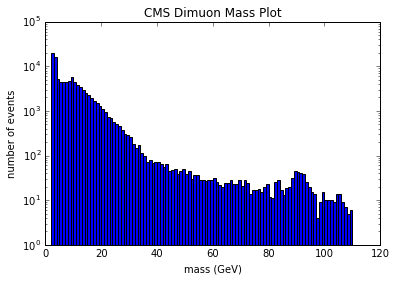

In [4]:
# adding a ; at the end of the next line will  "suppress" the text output of the histogram's frequency table
plt.hist(data.M, bins=120, range=[0,120], log=True)
plt.title("CMS Dimuon Mass Plot")
plt.xlabel("mass (GeV)")
plt.ylabel("number of events")

# Part Two
Create a histogram to show the production of one of the following particles: [J/$\Psi$](https://en.wikipedia.org/wiki/J/psi_meson), [Upsilon](https://en.wikipedia.org/wiki/Upsilon_meson) ($\Upsilon$), or [Z](https://en.wikipedia.org/wiki/W_and_Z_bosons).

# Part Three
Try selecting a subset of the events to analyze. This is called "applying cuts" to your data. Below are a few commands you may find useful.

In [ ]:
# create a new data set of only the events containing oppositely charges particles
data2 = data[data.Q1 != data.Q2] # change != to == for same charge

In [ ]:
# create a new data set of only events in a certain mass range
data3 = data[(data.M > 50) & (data.M < 80)] # this choses 50 to 80 GeV

In [ ]:
# make a scatterplot of two columns
# plt.scatter(x_column, y_column, s=point_size, other parameters)
plt.scatter(data.eta1, data.phi1, s=.05)

In [ ]:
# make your plots look like they're from xkcd.com
plt.xkcd()

# to make normal-looking plots again execute:
# mpl.rcParams.update(inline_rc)

# plt.hist can stack two histograms
d1 = data[data.Q1 == data.Q2]
d2 = data[data.Q1 != data.Q2]

plt.hist([d1.M, d2.M], range=[2,5], stacked=True, label=["same Q","opp Q"], bins=20, log=True)
plt.title("Cutting on net charge")
plt.xlabel("mass (GeV)")
plt.ylabel("log number of events")
plt.legend()

## Save Your Work

Download this notebook and upload it to your GitHub. Need a refresher? [Find instructions here](https://drive.google.com/open?id=1GszC6t8K9gSKdR-cigtoxaHK8V1IL_K2PXo5L87Z9xo).